In [1]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [31]:
def loadingImages(folder, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = filename.split('.')[0]
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
            labels.append(label)
    return images, labels

In [19]:
cat_images, cat_labels = loadingImages('../PRODIGY_ML_03/dogs-vs-cats/cats')
dog_images, dog_labels = loadingImages('../PRODIGY_ML_03/dogs-vs-cats/dogs')

In [21]:
images = np.concatenate((cat_images, dog_images))
labels = np.concatenate((cat_labels, dog_labels))

In [22]:
images = np.array(images)
labels = np.array(labels)

In [23]:
images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])
images_gray_flat = images_gray.reshape(images_gray.shape[0], -1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(images_gray_flat, labels, test_size=0.2, random_state=42)

In [25]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
y_pred = svm_classifier.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49833333333333335


In [20]:
testing_images, testing_labels = loadingImages('../PRODIGY_ML_03/dogs-vs-cats/test')

In [26]:
testing_images = np.array(testing_images)
testing_labels = np.array(testing_labels)

In [28]:
testing_images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in testing_images])
testing_images_gray_flat = testing_images_gray.reshape(testing_images_gray.shape[0], -1)

In [16]:
y_pred_testing = svm_classifier.predict(testing_images_gray_flat)

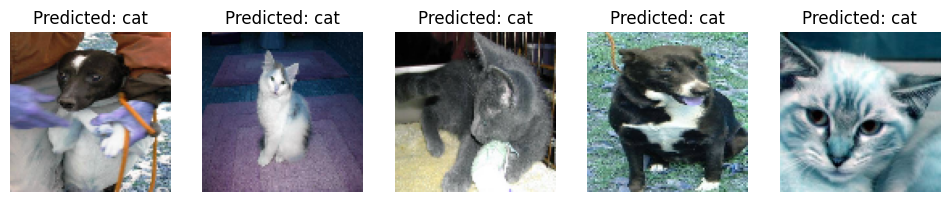

In [30]:
num_images_to_visualize = 5
plt.figure(figsize=(12, 8))
for i in range(num_images_to_visualize):
    plt.subplot(1, num_images_to_visualize, i + 1)
    plt.imshow(testing_images[i])
    plt.title(f'Predicted: {y_pred_testing[i]}')
    plt.axis('off')
plt.show()